In [58]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder , LabelEncoder , RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression

In [2]:
# loading dataset
path = r"E:\Code\AI\Eman Raslan\Linear Regression\kc_house_data.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
0,7129300520,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,5650,1180,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,7242,2170,400
2,5631500400,20150225T000000,180000.0,2,1.00,770,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,10000,770,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,5000,1050,910
4,1954400510,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,8080,1680,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  sqft_l

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.494309,0.007542,0.234303,3.409430,7.656873,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,1.510697e+04,1788.390691,291.509045
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,0.539989,0.086517,0.766318,0.650743,1.175459,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,4.142051e+04,828.090978,442.575043
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,5.200000e+02,290.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,5.040000e+03,1190.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,7.618000e+03,1560.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1.068800e+04,2210.000000,560.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.651359e+06,9410.000000,4820.000000


In [6]:
coulmns = df.columns
print(coulmns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_lot',
       'sqft_above', 'sqft_basement'],
      dtype='object')


In [7]:
df.shape

(21613, 21)

In [8]:
# dropping unneeded columns
df.drop(columns=['id', 'zipcode' , 'date','lat' , 'long'], inplace=True)

In [9]:
df.shape

(21613, 16)

In [10]:
# checking for missing values
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
condition        0
grade            0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
sqft_lot         0
sqft_above       0
sqft_basement    0
dtype: int64

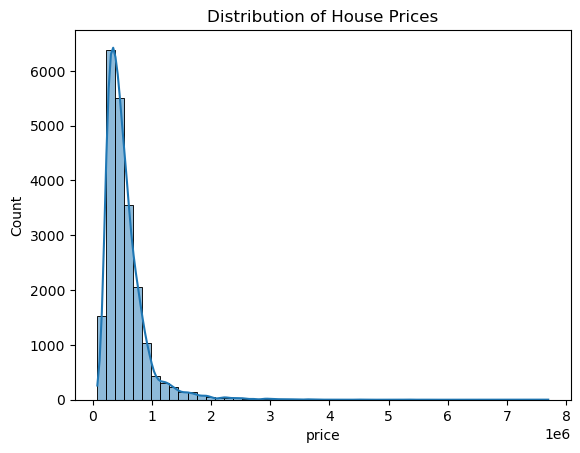

In [11]:
sns.histplot(data=df, x='price', bins=50 ,kde=True)
plt.title('Distribution of House Prices')
plt.show()

In [12]:
px.histogram(df, x='price', title='Distribution of House Prices')

In [13]:
# checking for outliers using IQR method
def CheckOutliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


def RemoveOutliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return cleaned_data

In [14]:
num_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(num_columns)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'sqft_lot', 'sqft_above', 'sqft_basement']


In [15]:
for col in num_columns:
    checking_outliers = CheckOutliers(df, col)
    print(f"Number of outliers in '{col}': {len(checking_outliers)}")

Number of outliers in 'price': 1159
Number of outliers in 'bedrooms': 546
Number of outliers in 'bathrooms': 571
Number of outliers in 'sqft_living': 572
Number of outliers in 'floors': 0
Number of outliers in 'waterfront': 163
Number of outliers in 'view': 2124
Number of outliers in 'condition': 30
Number of outliers in 'grade': 1911
Number of outliers in 'yr_built': 0
Number of outliers in 'yr_renovated': 914
Number of outliers in 'sqft_living15': 544
Number of outliers in 'sqft_lot15': 2194
Number of outliers in 'sqft_lot': 2425
Number of outliers in 'sqft_above': 611
Number of outliers in 'sqft_basement': 496


In [16]:
# value counts for categorical columns
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_columns:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts())
    print()

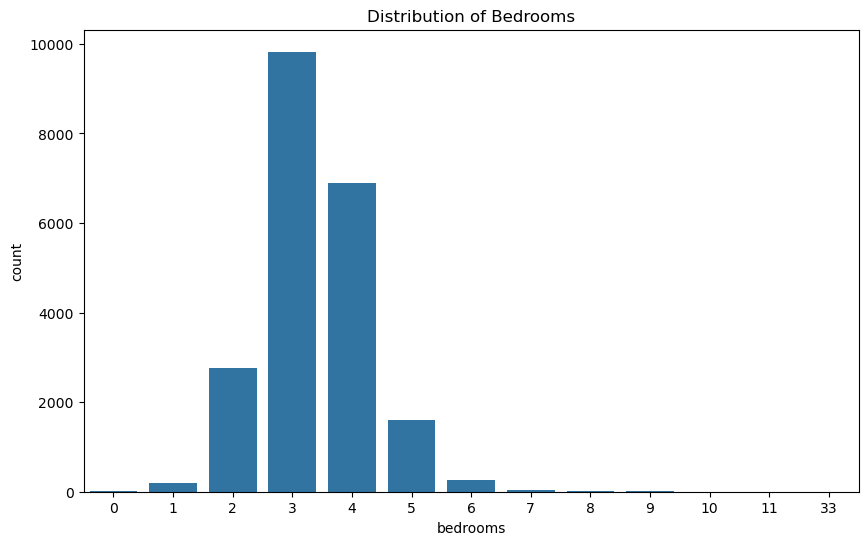

In [17]:
# Example visualization: Countplot of a categorical variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bedrooms')
plt.title('Distribution of Bedrooms')
plt.show()

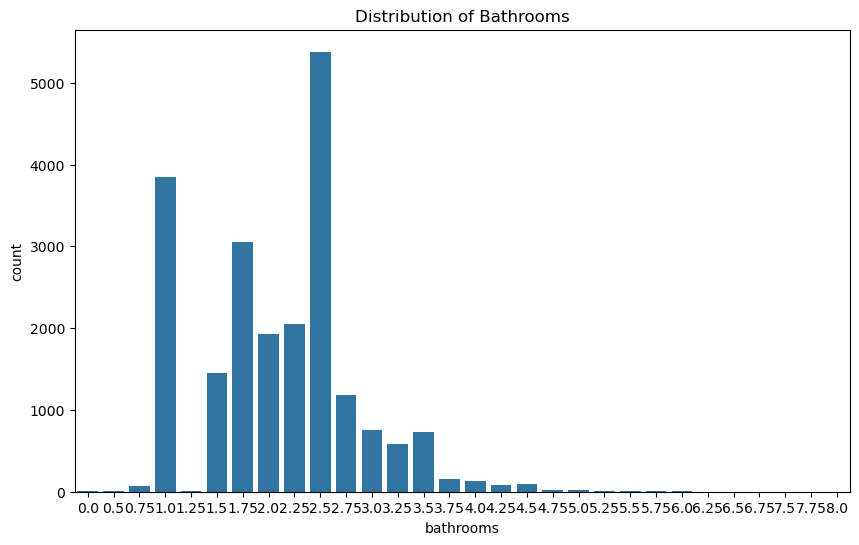

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bathrooms')
plt.title('Distribution of Bathrooms')
plt.show()

In [19]:
df['bathrooms'].value_counts()

bathrooms
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64

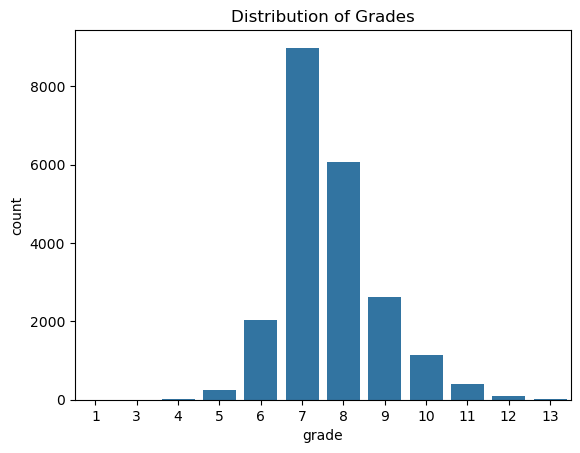

In [20]:
sns.countplot(data=df, x='grade')
plt.title('Distribution of Grades')
plt.show()

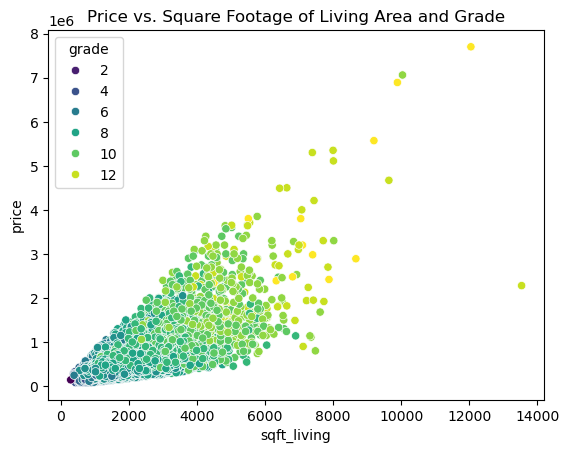

In [21]:
sns.scatterplot(data=df, x='sqft_living', y='price' ,   hue='grade' , palette='viridis' )
plt.title('Price vs. Square Footage of Living Area and Grade')
plt.show()

In [22]:
df['age'] = 2025 - df['yr_built']

In [23]:
df['age'].value_counts()

age
11     559
19     454
20     450
21     433
22     422
      ... 
92      30
124     29
123     27
90      24
91      21
Name: count, Length: 116, dtype: int64

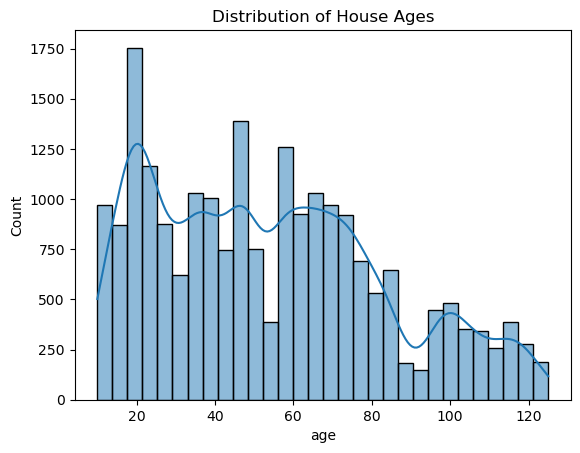

In [24]:
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Distribution of House Ages')
plt.show()

In [25]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement,age
0,221900.0,3,1.00,1180,1.0,0,0,3,7,1955,0,1340,5650,5650,1180,0,70
1,538000.0,3,2.25,2570,2.0,0,0,3,7,1951,1991,1690,7639,7242,2170,400,74
2,180000.0,2,1.00,770,1.0,0,0,3,6,1933,0,2720,8062,10000,770,0,92
3,604000.0,4,3.00,1960,1.0,0,0,5,7,1965,0,1360,5000,5000,1050,910,60
4,510000.0,3,2.00,1680,1.0,0,0,3,8,1987,0,1800,7503,8080,1680,0,38


Text(0.5, 1.0, 'Correlation Matrix')

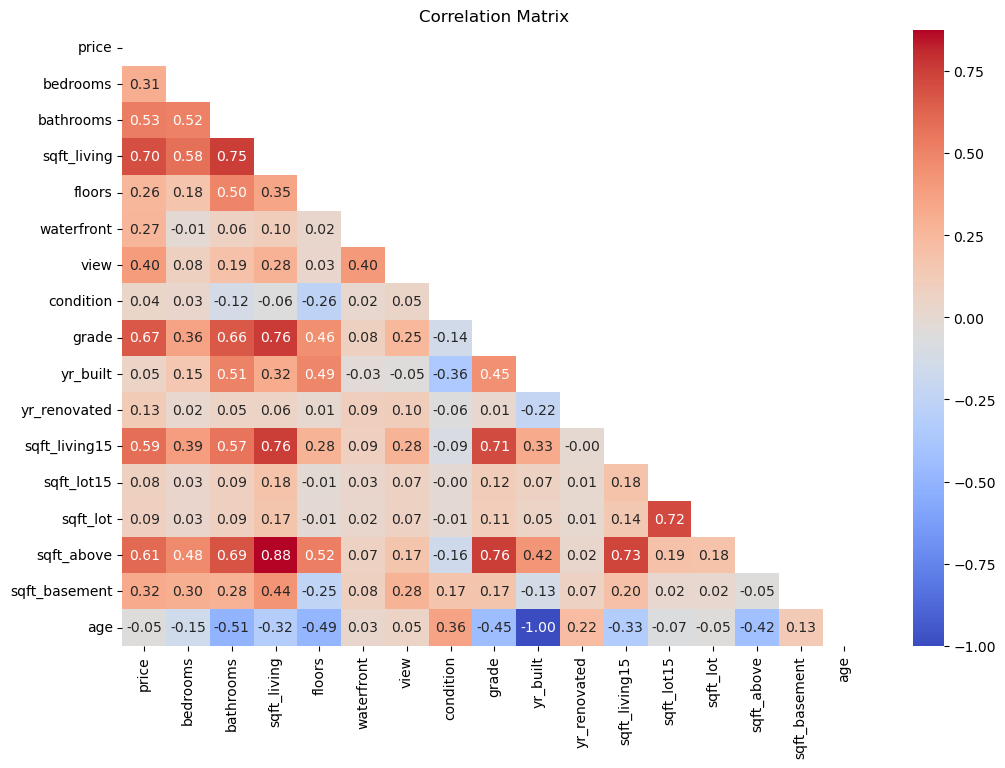

In [29]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')

In [32]:
coulmns = df.columns
print(coulmns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'age'],
      dtype='object')


In [33]:
df.drop(columns=['age' , 'yr_built' , 'condition' , 'sqft_lot' , 'sqft_lot15'], inplace=True)

Text(0.5, 1.0, 'Correlation Matrix')

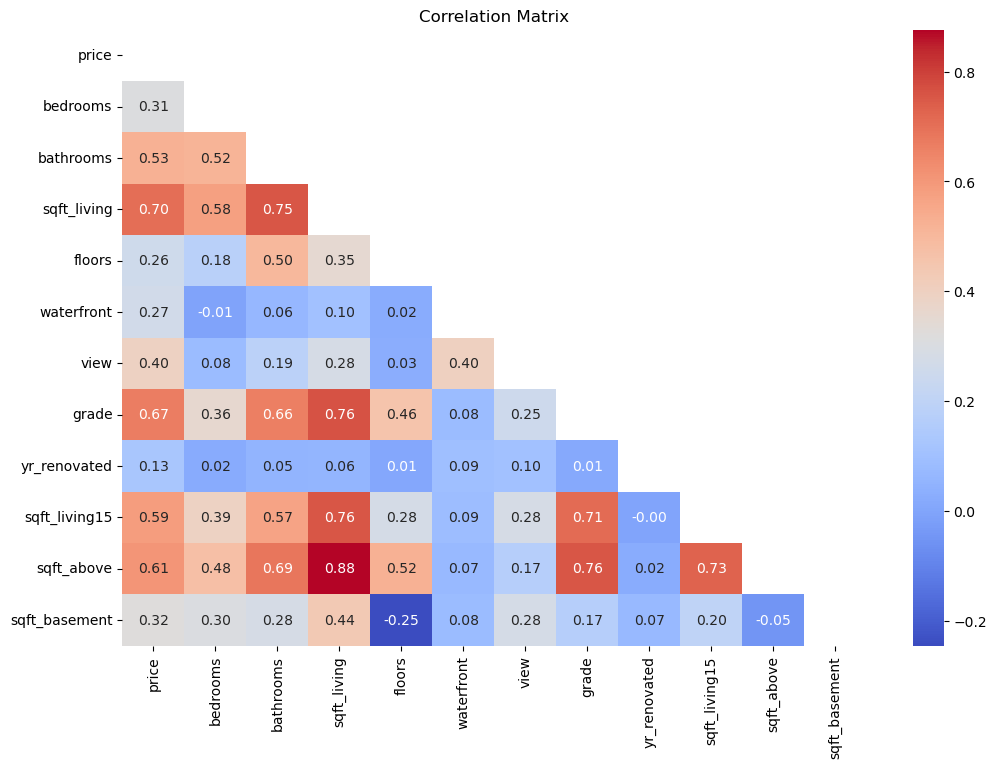

In [ ]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')

In [37]:
df.drop(columns=['sqft_above'], inplace=True)

In [38]:
coulmns = df.columns
print(coulmns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'grade', 'yr_renovated', 'sqft_living15', 'sqft_basement'],
      dtype='object')


Text(0.5, 1.0, 'Correlation Matrix')

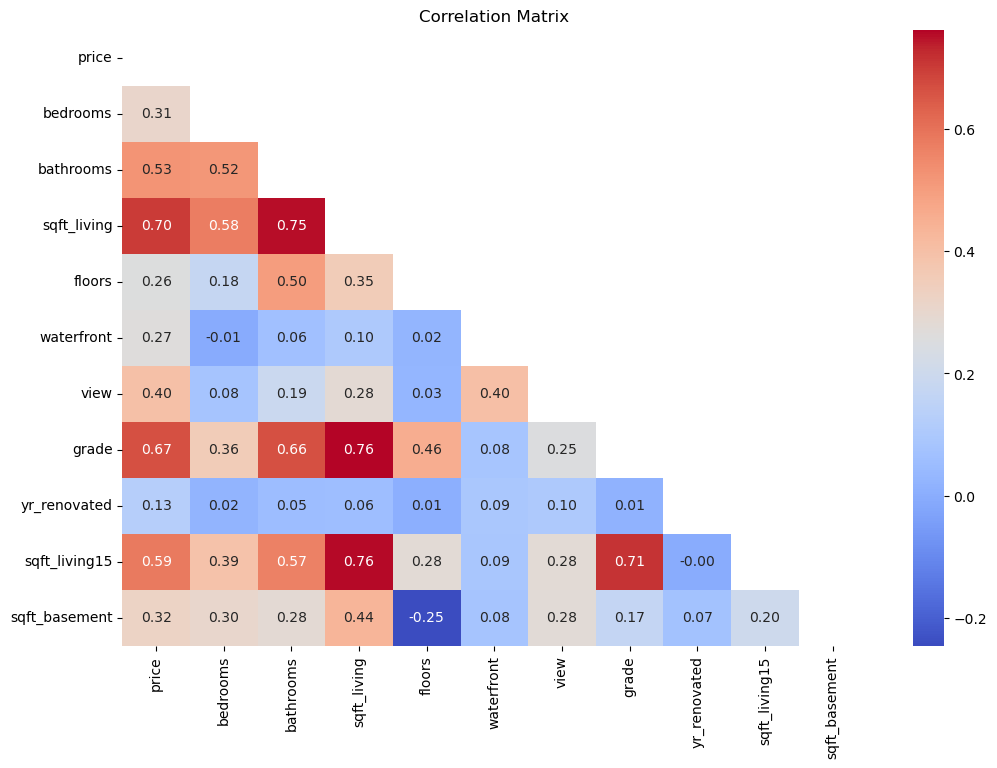

In [39]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')

In [40]:
df.shape

(21613, 11)

In [41]:
num_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(num_columns)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'yr_renovated', 'sqft_living15', 'sqft_basement']


In [42]:
for col in num_columns:
    checking_outliers = CheckOutliers(df, col)
    print(f"Number of outliers in '{col}': {len(checking_outliers)}")

Number of outliers in 'price': 1159
Number of outliers in 'bedrooms': 546
Number of outliers in 'bathrooms': 571
Number of outliers in 'sqft_living': 572
Number of outliers in 'floors': 0
Number of outliers in 'waterfront': 163
Number of outliers in 'view': 2124
Number of outliers in 'grade': 1911
Number of outliers in 'yr_renovated': 914
Number of outliers in 'sqft_living15': 544
Number of outliers in 'sqft_basement': 496


In [46]:
cleaned_df = RemoveOutliers(df, 'price')

In [49]:
for col in num_columns:
    checking_outliers = CheckOutliers(cleaned_df, col)
    print(f"Number of outliers in '{col}': {len(checking_outliers)}")

Number of outliers in 'price': 260
Number of outliers in 'bedrooms': 482
Number of outliers in 'bathrooms': 100
Number of outliers in 'sqft_living': 319
Number of outliers in 'floors': 0
Number of outliers in 'waterfront': 61
Number of outliers in 'view': 1579
Number of outliers in 'grade': 1183
Number of outliers in 'yr_renovated': 766
Number of outliers in 'sqft_living15': 386
Number of outliers in 'sqft_basement': 539


In [51]:
cleaned_df.shape

(20454, 11)

In [53]:
df = cleaned_df.copy()

In [54]:
df.shape

(20454, 11)

In [56]:
X = df.drop(columns=['price'])
y = df['price']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Since all columns in X are numerical, we can create a single pipeline.
# The outlier removal was already done in previous cells.
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Fit and transform the training data
X_train = num_pipeline.fit_transform(X_train)

# Transform the test data
X_test = num_pipeline.transform(X_test)

In [61]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16363, 10) (4091, 10) (16363,) (4091,)


In [ ]:
# create and train the model function
def TrainModel(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model